<a href="https://colab.research.google.com/github/joseluisfalla/DSPS_JFalla/blob/main/HW2/HW2_CentralLimitTheorem_JFalla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Written by Federica B. Bianco @fedhere
UDel DSPS

 # Homework 2

 This is a skeleton & instruction notebook

-  GENERATE  100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total),
 _all with the same population mean_. Include a _Normal_, a _Poisson_, a _Binomial_, a _Chi-Squared_ distribution, and 1 more of your choice.                                       
-  For distribution plot the sample mean of each sample (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well).
-  Describe the behavior you see in the plots in terms of the law of large numbers.
-  PLOT the distributions of all sample means (together for all distributions). _Mandatory_: as a histogram. _Optional_: in any other way you think is convincing
-  Extra Credit (required for 661 students): FIT a gaussian to the distribution of means. i.e. to the height of the bins if a histogram of sample means           

In [20]:
from __future__ import print_function
__author__= 'fbb'

import pylab as pl
# this package sets up pretty plots
from scipy.optimize import curve_fit, minimize

%pylab inline
import seaborn
seaborn.set_style("darkgrid")


Populating the interactive namespace from numpy and matplotlib


In [21]:
import numpy as np
np.__version__

'1.23.5'

## choose which distributions to use

In [22]:
distributions = ['chisq', 'normal', 'poisson', 'binomial', 'laplace']

## and which *population* mean to give it (it will be the same for each distribution)

In [23]:
my_mean = 100

# Let's see what this distribution looks like, what is the PDF, and how are the moments defined. Wikipedia is great for this!

![1](https://raw.githubusercontent.com/fedhere/DSPS_FBianco/master/HW2/chisq1.png)

![2](https://raw.githubusercontent.com/fedhere/DSPS_FBianco/master/HW2/chisq2.png)

For chi2 the parameter is *k* degrees of freedom. the mean is mean=*k*, the variance is 2*k*

# Then lets look at the numpy random sampling package to see how I create the distribution
https://numpy.org/doc/stable/reference/random/index.html#module-numpy.random
https://numpy.org/doc/stable/reference/random/generated/numpy.random.chisquare.html

In class aI used scipy.stats. You are free to use what you want!



In [24]:
# the chi sq distribution takes the number of degrees of freedom,
# which luckily is the same as the mean!
df = my_mean

## I am making a dictionary to host the distributions.

that is only one possible option. with a dictionary I can easily inspect the distribution I want by its name: it is a very human friendly data storage. In this example I am only using a single distribution, so for me it is overkill, but if I were doing the whole exercise with 5 or 6 distributions it would be useful! But youn can do this however you want

Lets start by looking at a single chi sq distribution of 100 elements

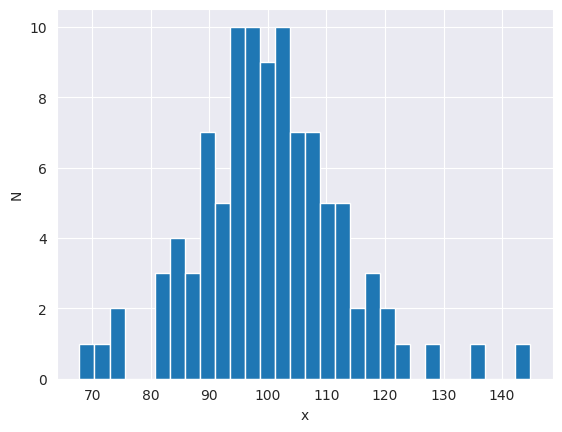

In [25]:
# Note: I am adding imports here, to show the workflow:
# at this point I realize what packages I need and I import them.
# but this is a PEP8 violation.
# It is a good habit to put the includes at the top
# so the code fails right away if the packages are missing.
# Otherwise a user may have a piece of code running for a long time,
# and then fail when the package cannot be imported...
# (unless they are only imported under conditions, e.g. in an if statement)

# import numpy as np
np.random.seed(1776) #WHY DO I DO THIS??
# prepare a container for all the distribution:
# a dictionary so you can call each family of distribution by "key"
mydists = {}
# mydists is an empty disctionary;
# if you are not familiar with python dictionaries see https://www.pythonforbeginners.com/dictionary/how-to-use-dictionaries-in-python
mydists['chisq'] = {}
# mydists['chisq'] is an element of the mydist dictionary, itself a dictionary
mydists['chisq'][100] = np.random.chisquare(my_mean, size=100)
# mydists now is a dictionary with one object in it:
#             a dictionary by the key 'chisq'
# mydists['chisq'] is a dictionary with one object in it:
#             an array of 100 elements by the key 100
pl.hist(mydists['chisq'][100], bins = 30)
pl.ylabel('N')
pl.xlabel('x');

### Figure 1: Chi sq distribution of a sample of size 100 for a Chi square distribution with  100 degrees of freedom.

## let numpy calculate what the mean and stdev of this distribution are

In [26]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(mydists['chisq'][100].mean(), mydists['chisq'][100].std()))

Chisq mean: 100.13, standard deviation: 12.69


## Now let's do it for 100 Chisq distributions
we want distributions of different sizes (all integers between 10 and 2000 - note that generally size > 30 is considered necessary for the theorem to hold). It's a good idea to create more small distributions, cause, as we will see, their means will be more noisy (due to the law of large numbers which we discussed in class). Here are some tricks to create the distribution sizes. But you do not lave to do it like this. You do you, just make it work.

In [27]:
#mysize = (np.random.rand(100) * 1000).astype(int)
#mysize = (2000 / (np.array(range(1, 101)))).astype(int)
#mysize = (1000 / (np.array(np.arange(1, 101) + [10]))).astype(int)
#mysize = (np.logspace(1, 4.3, 100, base=10)).astype(int)
my_size = (np.logspace(1, 4.3, 100, base=10)).astype(int)
print ("shape of the 'size' list that contains the size of each distribution",
       my_size.shape)

shape of the 'size' list that contains the size of each distribution (100,)


Text(0, 0.5, 'frequency')

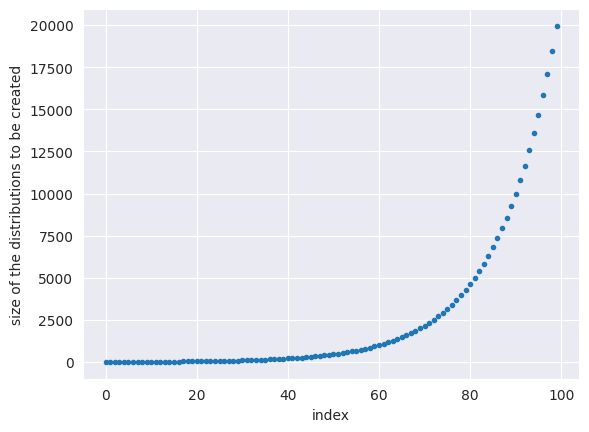

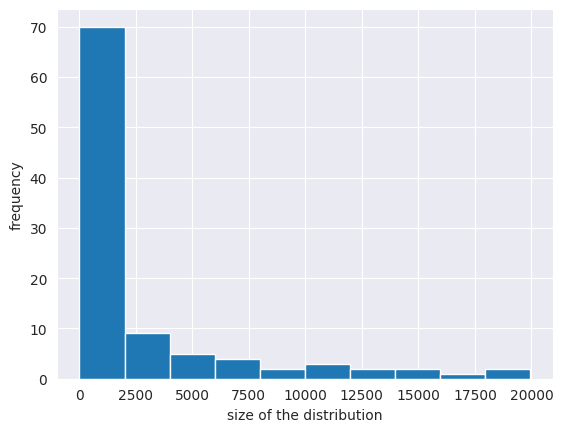

In [28]:
pl.plot(my_size, '.')
pl.xlabel("index")
pl.ylabel("size of the distributions to be created");

pl.figure()
pl.hist(my_size)
pl.xlabel("size of the distribution")
pl.ylabel("frequency")


Figure 2: scatter plot and distribution of sample sizes for 100 samples to be created (note, the current choice does not produce more small then large distribution, which is desirable)

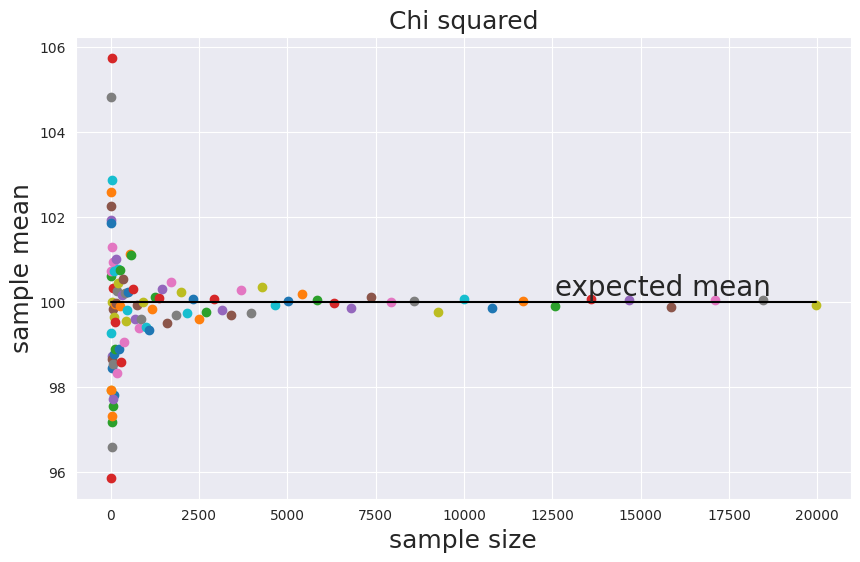

In [29]:

# fill dictionary in in a for loop. not pythonic, but easily readable

for n in my_size:
    mydists['chisq'][n] = np.random.chisquare(df, size=n) #all distributions have mean=df=100

# save the means for plotting later

mydists['chisq']['means'] = {}
# prepare the figure
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in mydists['chisq']:
    if not type(nn) == str: # needed because one element is "mean"
        mydists['chisq']['means'][nn] = mydists['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, mydists['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
axchisq_mu_n.set_title('Chi squared', fontsize=18)
axchisq_mu_n.plot([min(my_size), max(my_size)], [df, df], 'k')
axchisq_mu_n.text(axchisq_mu_n.get_xlim()[1] * .6, 100, "expected mean",
                  va="bottom", fontsize=20);

### Figure 3: Here, as the sample size increases, the sampling distribution of the mean in the Chi-Square distribution tends toward the standard normal distribution. This show that, independent of the Chi-Square distribution's mean and standard deviation, the sample mean approaches a normal distribution as $N \rightarrow \infty$.

# <mark>WFF</mark> The description of this plot is not so precise. This plot isn't showing that the means of the chi distribution form a normal distribution, this plot is showing that as you increase the sample size, the sample mean approaches the population mean.

# now the histogram of the mean of all samples:
## this requires some data wrangling, since i put the data in a dictionary which is a user friendly data structure, but perhaps not the most machine friendly one

a coder friendly, though not terribly pythonic way to do it is to append each mean in a list in a for loop, and then hist that. be careful: if your data size gets large this becomes a very bad idea!!

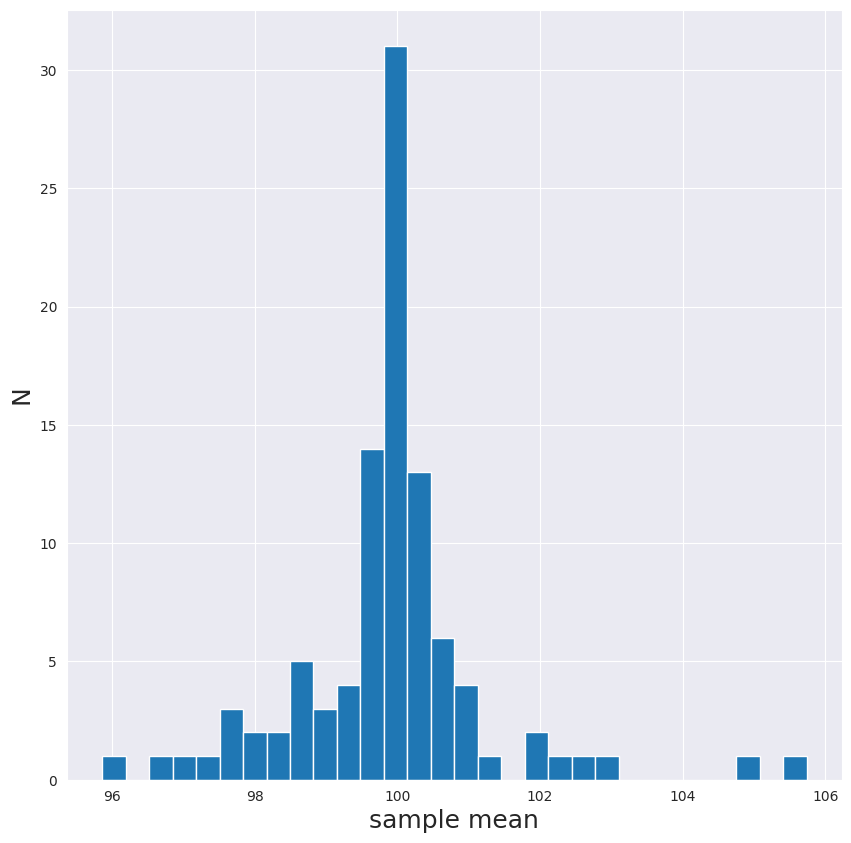

In [30]:
all_means_chisq = list(mydists['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(all_means_chisq,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18);

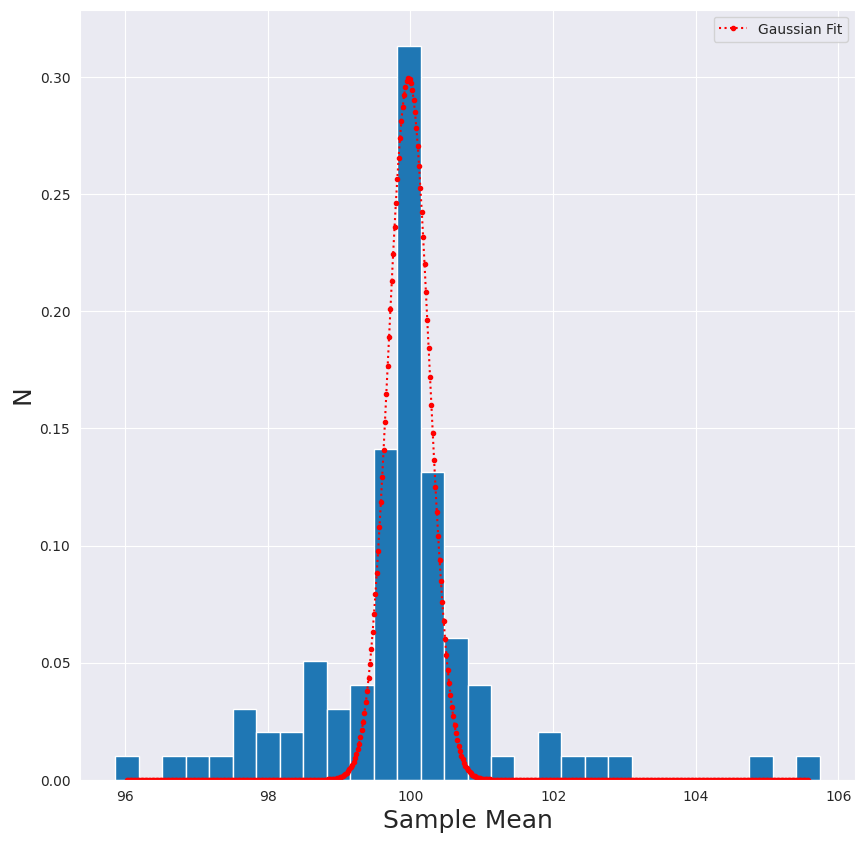

In [31]:
def gaussian(x, C, mu, sigma):
    return C * np.exp(-(x - mu)**2 / (2 * sigma**2))

heights, bin_edges, patch = pl.hist(all_means_chisq,bins=30)
heights = heights/sum(heights)

pl.close()

y_hist = heights
x_hist = (bin_edges[:-1] + bin_edges[1:]) / 2

mu = sum(x_hist * y_hist) / sum(y_hist)
sigma = sum(y_hist * (x_hist - mu)**2) / sum(y_hist)

popt, pcov = curve_fit(gaussian, x_hist, y_hist, p0=[max(y_hist), mu, sigma], maxfev=5000)

pl.figure(figsize=(10, 10))

x_hist_2 = np.linspace(np.min(x_hist), np.max(x_hist), 500)
pl.plot(x_hist_2, gaussian(x_hist_2, *popt),'r.:', label='Gaussian Fit')
pl.legend()

weights = np.ones_like(all_means_chisq) / len(all_means_chisq)
pl.hist(all_means_chisq, bins=30, weights=weights)
pl.xlabel('Sample Mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.show()

## Figure 4: Histogram showing the lower bound to the central limit theorem. That is, the sample mean of the Chi-Squared distribution approaches the normal distribution for $N \gtrapprox 30$.

# <mark>WFF</mark> This figure caption could be more precise. It is an example of the central limit theorem, but what is happening is that the distribution of sample means, drawn from the chisq distribution, are gaussian distributed with a mean corresponding to the population mean of the chisq distribution.

# Do it for the Normal distribution


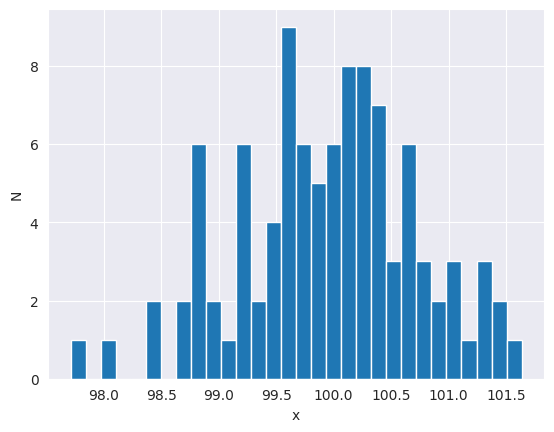

In [32]:
np.random.seed(1776)

mydists['normal'] = {}
mydists['normal'][100] = np.random.normal(loc=my_mean, scale=1, size=100)

pl.hist(mydists['normal'][100], bins = 30)
pl.ylabel('N')
pl.xlabel('x');

In [33]:
normal_mean = mydists['normal'][100].mean()
normal_std = mydists['normal'][100].std()

print(f'Normal mean = {normal_mean:.2f}.', '\n', f'Normal distribution standard deviation = {normal_std:.2f}.')

Normal mean = 99.94. 
 Normal distribution standard deviation = 0.77.


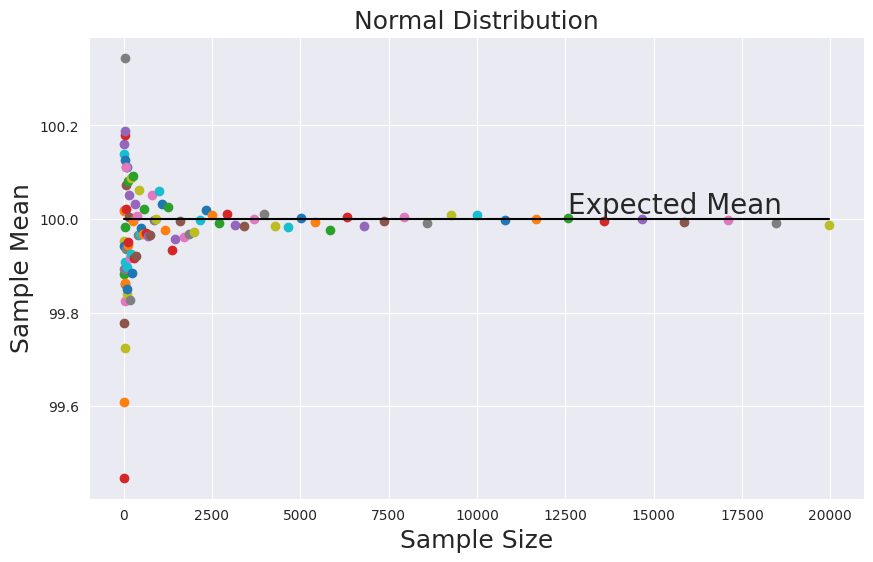

In [34]:
# fill dictionary in in a for loop. not pythonic, but easily readable

for n in my_size:
    mydists['normal'][n] = np.random.normal(loc=my_mean, size=n) #all distributions have mean=df=100

# save the means for plotting later

mydists['normal']['means'] = {}
# prepare the figure
axnormal_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in mydists['normal']:
    if not type(nn) == str: # needed because one element is "mean"
        mydists['normal']['means'][nn] = mydists['normal'][nn].mean()
        #and plot it
        axnormal_mu_n.plot(nn, mydists['normal']['means'][nn], 'o')
        axnormal_mu_n.set_xlabel('Sample Size', fontsize=18)
        axnormal_mu_n.set_ylabel('Sample Mean', fontsize=18)
axnormal_mu_n.set_title('Normal Distribution', fontsize=18)
axnormal_mu_n.plot([min(my_size), max(my_size)], [my_mean, my_mean], 'k')
axnormal_mu_n.text(axnormal_mu_n.get_xlim()[1] * .6, 100, "Expected Mean",
                  va="bottom", fontsize=20);

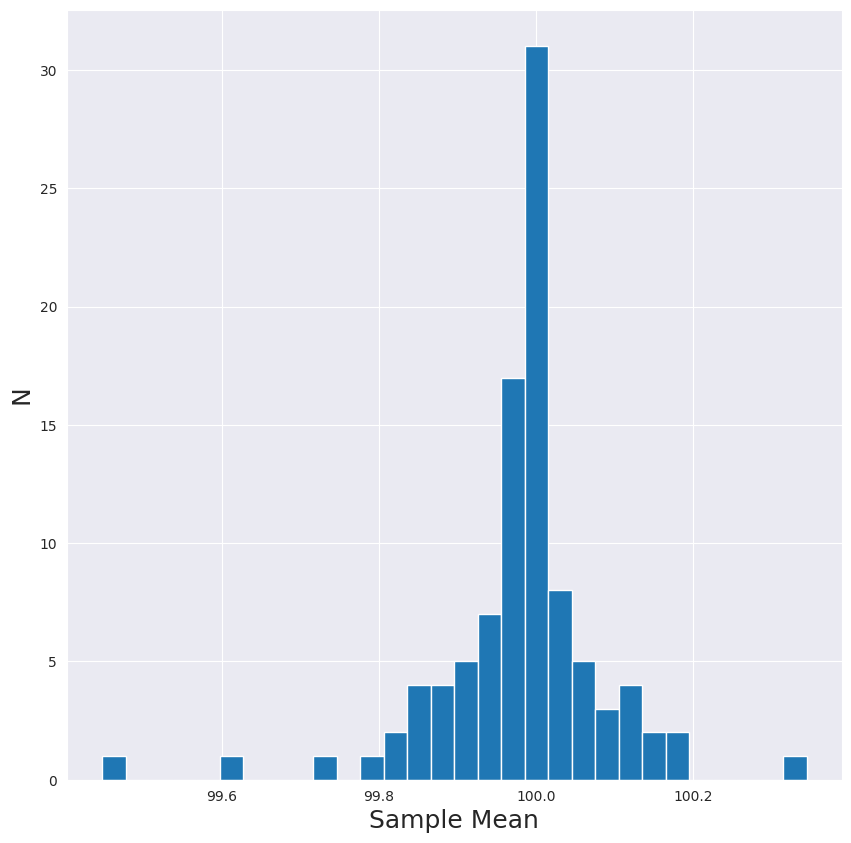

In [35]:
all_means_normal = list(mydists['normal']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(all_means_normal, bins=30)
pl.xlabel('Sample Mean', fontsize = 18)
pl.ylabel('N', fontsize = 18);

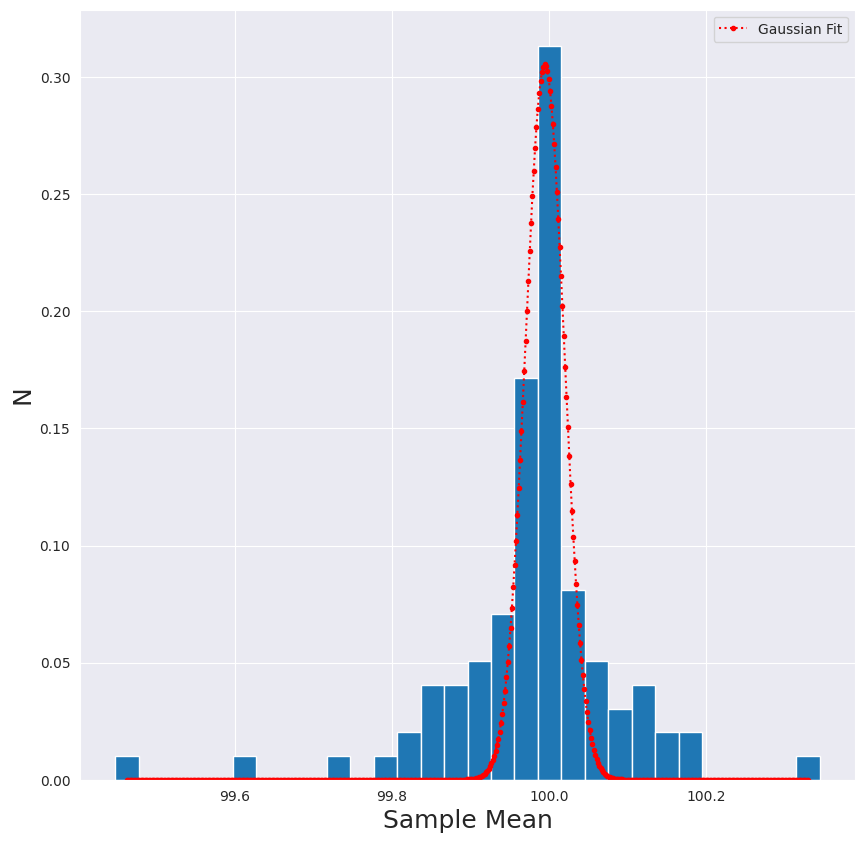

In [36]:
def gaussian(x, C, mu, sigma):
    return C * np.exp(-(x - mu)**2 / (2 * sigma**2))

heights, bin_edges, patch = pl.hist(all_means_normal,bins=30)
heights = heights/sum(heights)

pl.close()

y_hist = heights
x_hist = (bin_edges[:-1] + bin_edges[1:]) / 2

mu = sum(x_hist * y_hist) / sum(y_hist)
sigma = sum(y_hist * (x_hist - mu)**2) / sum(y_hist)

popt, pcov = curve_fit(gaussian, x_hist, y_hist, p0=[max(y_hist), mu, sigma], maxfev=5000)

pl.figure(figsize=(10, 10))

x_hist_2 = np.linspace(np.min(x_hist), np.max(x_hist), 500)
pl.plot(x_hist_2, gaussian(x_hist_2, *popt),'r.:', label='Gaussian Fit')
pl.legend()

weights = np.ones_like(all_means_normal) / len(all_means_normal)
pl.hist(all_means_normal, bins=30, weights=weights)
pl.xlabel('Sample Mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.show()

# Do it for the Poisson distribution

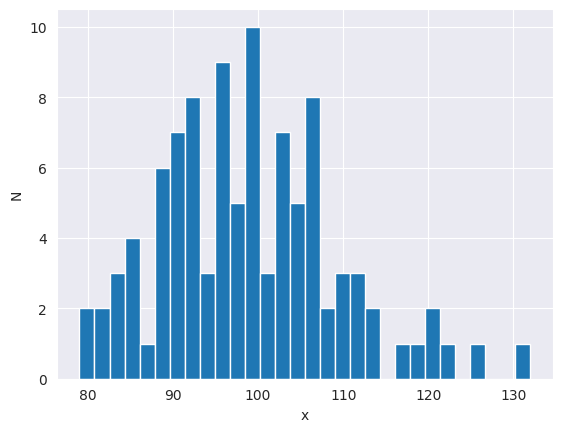

In [37]:
np.random.seed(1776)

mydists['poisson'] = {}
mydists['poisson'][100] = np.random.poisson(lam=my_mean, size=100)

pl.hist(mydists['poisson'][100], bins = 30)
pl.ylabel('N')
pl.xlabel('x');

In [38]:
poisson_mean = mydists['poisson'][100].mean()
poisson_std = mydists['poisson'][100].std()

print(f'Poisson distribution mean = {poisson_mean:.2f}.', '\n', f'Poisson distribution standard deviation = {poisson_std:.2f}.')

Poisson distribution mean = 98.91. 
 Poisson distribution standard deviation = 10.42.


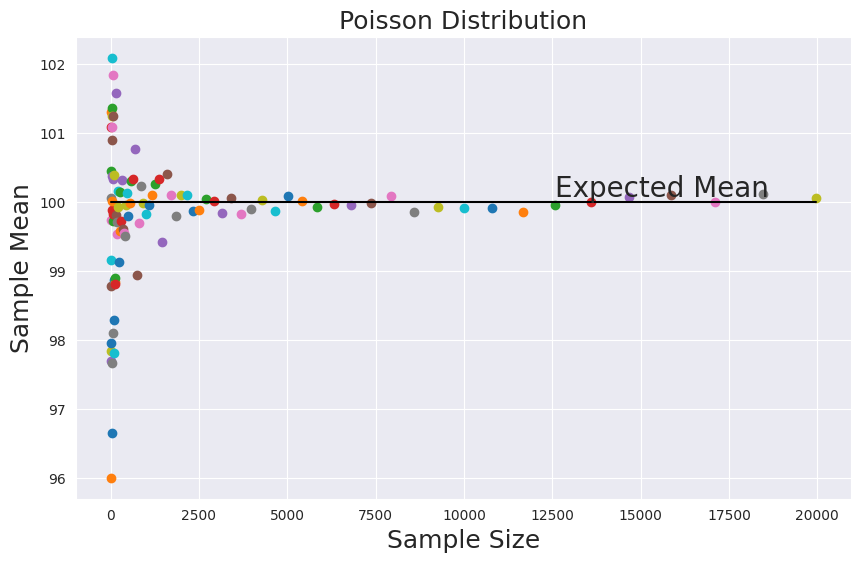

In [39]:
for n in my_size:
    mydists['poisson'][n] = np.random.poisson(lam=my_mean, size=n)

mydists['poisson']['means'] = {}

axnormal_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in mydists['poisson']:
    if not type(nn) == str: # needed because one element is "mean"
        mydists['poisson']['means'][nn] = mydists['poisson'][nn].mean()
        #and plot it
        axnormal_mu_n.plot(nn, mydists['poisson']['means'][nn], 'o')
        axnormal_mu_n.set_xlabel('Sample Size', fontsize=18)
        axnormal_mu_n.set_ylabel('Sample Mean', fontsize=18)
axnormal_mu_n.set_title('Poisson Distribution', fontsize=18)
axnormal_mu_n.plot([min(my_size), max(my_size)], [my_mean, my_mean], 'k')
axnormal_mu_n.text(axnormal_mu_n.get_xlim()[1] * .6, 100, "Expected Mean",
                  va="bottom", fontsize=20);

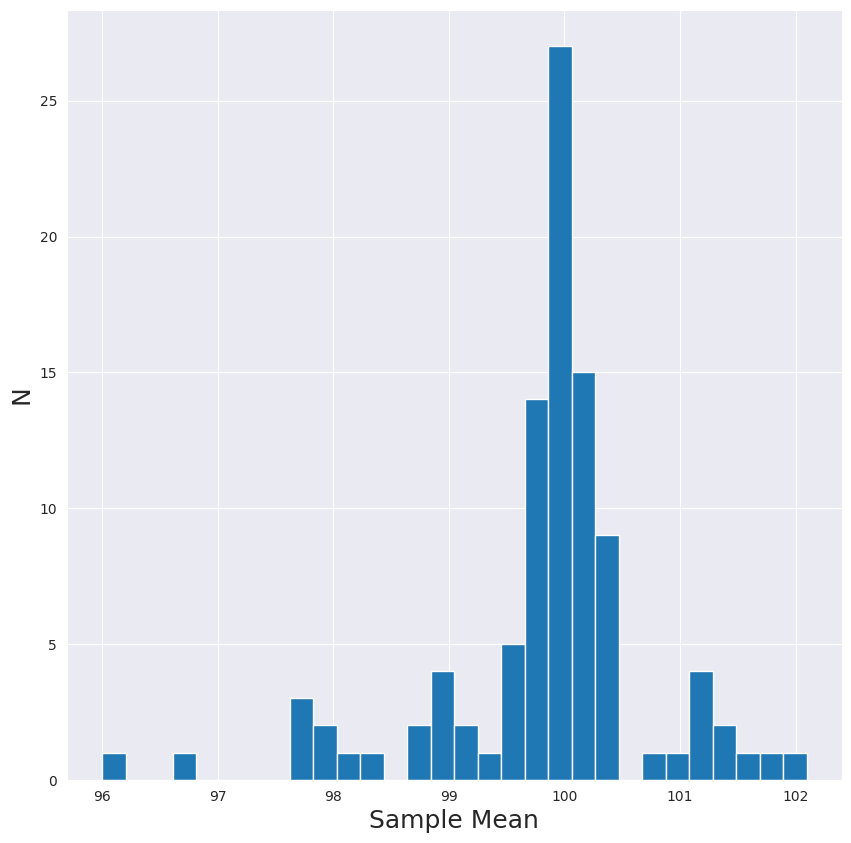

In [40]:
all_means_poisson = list(mydists['poisson']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(all_means_poisson, bins=30)
pl.xlabel('Sample Mean', fontsize = 18)
pl.ylabel('N', fontsize = 18);

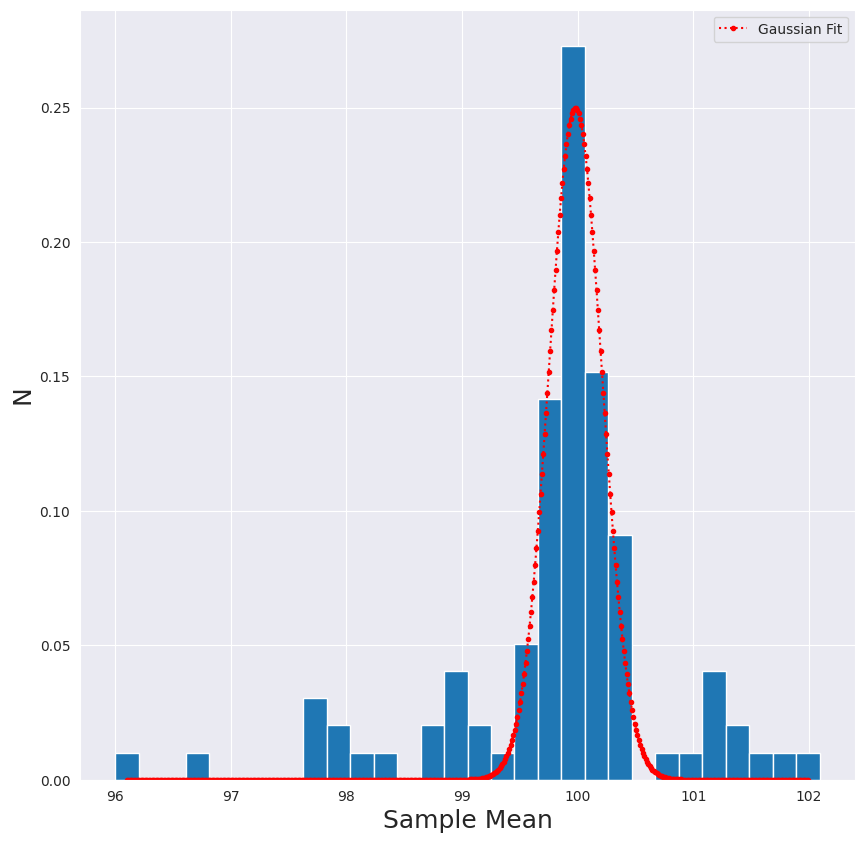

In [41]:
def gaussian(x, C, mu, sigma):
    return C * np.exp(-(x - mu)**2 / (2 * sigma**2))

heights, bin_edges, patch = pl.hist(all_means_poisson, bins=30)
heights = heights/sum(heights)

pl.close()

y_hist = heights
x_hist = (bin_edges[:-1] + bin_edges[1:]) / 2

mu = sum(x_hist * y_hist) / sum(y_hist)
sigma = sum(y_hist * (x_hist - mu)**2) / sum(y_hist)

popt, pcov = curve_fit(gaussian, x_hist, y_hist, p0=[max(y_hist), mu, sigma], maxfev=5000)

pl.figure(figsize=(10, 10))

x_hist_2 = np.linspace(np.min(x_hist), np.max(x_hist), 500)
pl.plot(x_hist_2, gaussian(x_hist_2, *popt),'r.:', label='Gaussian Fit')
pl.legend()

weights = np.ones_like(all_means_poisson) / len(all_means_poisson)
pl.hist(all_means_poisson, bins=30, weights=weights)
pl.xlabel('Sample Mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.show()

# Do it for the Binomial distribution

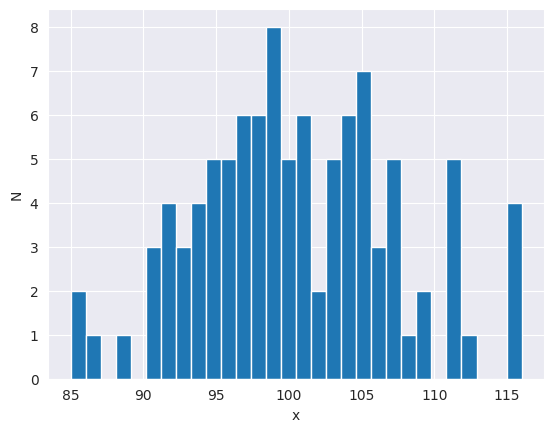

In [42]:
np.random.seed(1776)

mydists['binomial'] = {}
mydists['binomial'][100] = np.random.binomial(200, 0.5, size=100)

pl.hist(mydists['binomial'][100], bins = 30)
pl.ylabel('N')
pl.xlabel('x');

In [43]:
binomial_mean = mydists['binomial'][100].mean()
binomial_std = mydists['binomial'][100].std()

print(f'Binomial distribution mean = {binomial_mean:.2f}.', '\n', f'Binomial distribution standard deviation = {binomial_std:.2f}.')

Binomial distribution mean = 100.51. 
 Binomial distribution standard deviation = 6.60.


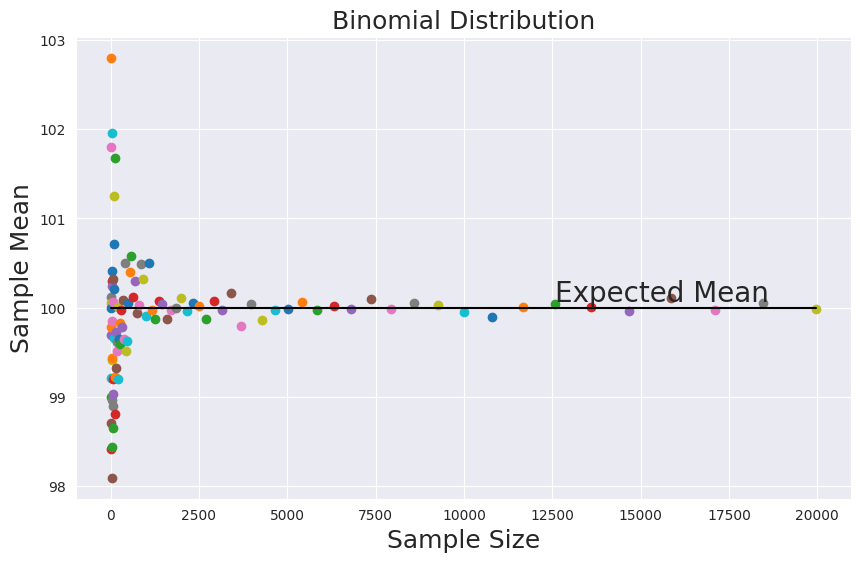

In [44]:
for n in my_size:
    mydists['binomial'][n] = np.random.binomial(200, 0.5, size=n)

mydists['binomial']['means'] = {}

axnormal_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in mydists['binomial']:
    if not type(nn) == str: # needed because one element is "mean"
        mydists['binomial']['means'][nn] = mydists['binomial'][nn].mean()
        #and plot it
        axnormal_mu_n.plot(nn, mydists['binomial']['means'][nn], 'o')
        axnormal_mu_n.set_xlabel('Sample Size', fontsize=18)
        axnormal_mu_n.set_ylabel('Sample Mean', fontsize=18)
axnormal_mu_n.set_title('Binomial Distribution', fontsize=18)
axnormal_mu_n.plot([min(my_size), max(my_size)], [my_mean, my_mean], 'k')
axnormal_mu_n.text(axnormal_mu_n.get_xlim()[1] * .6, 100, "Expected Mean",
                  va="bottom", fontsize=20);

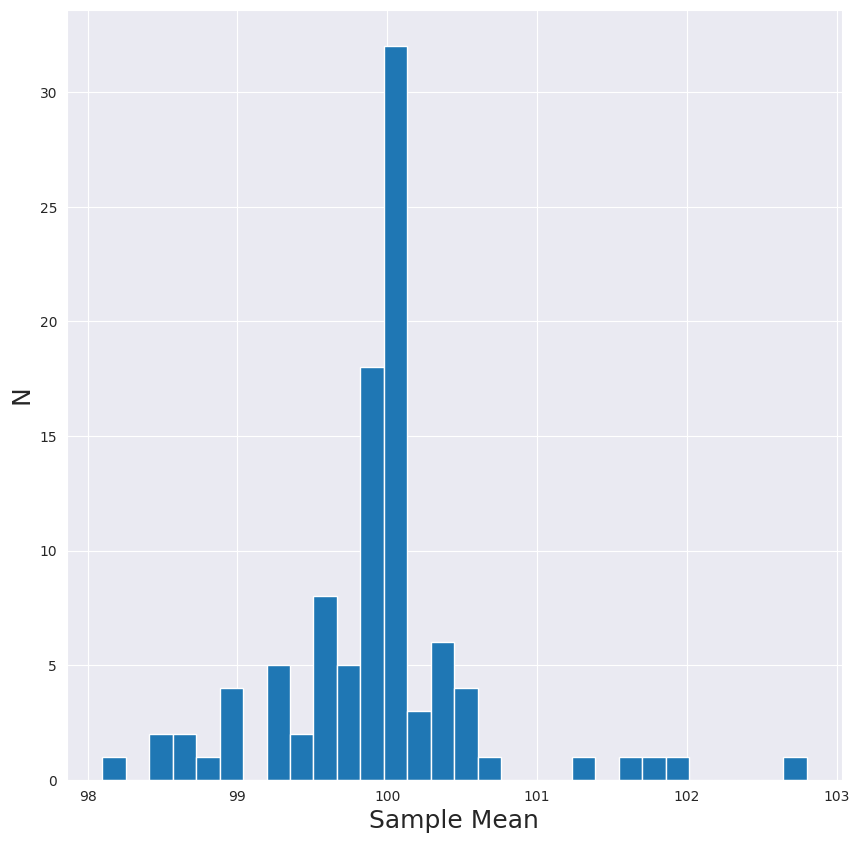

In [45]:
all_means_binomial = list(mydists['binomial']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(all_means_binomial, bins=30)
pl.xlabel('Sample Mean', fontsize = 18)
pl.ylabel('N', fontsize = 18);

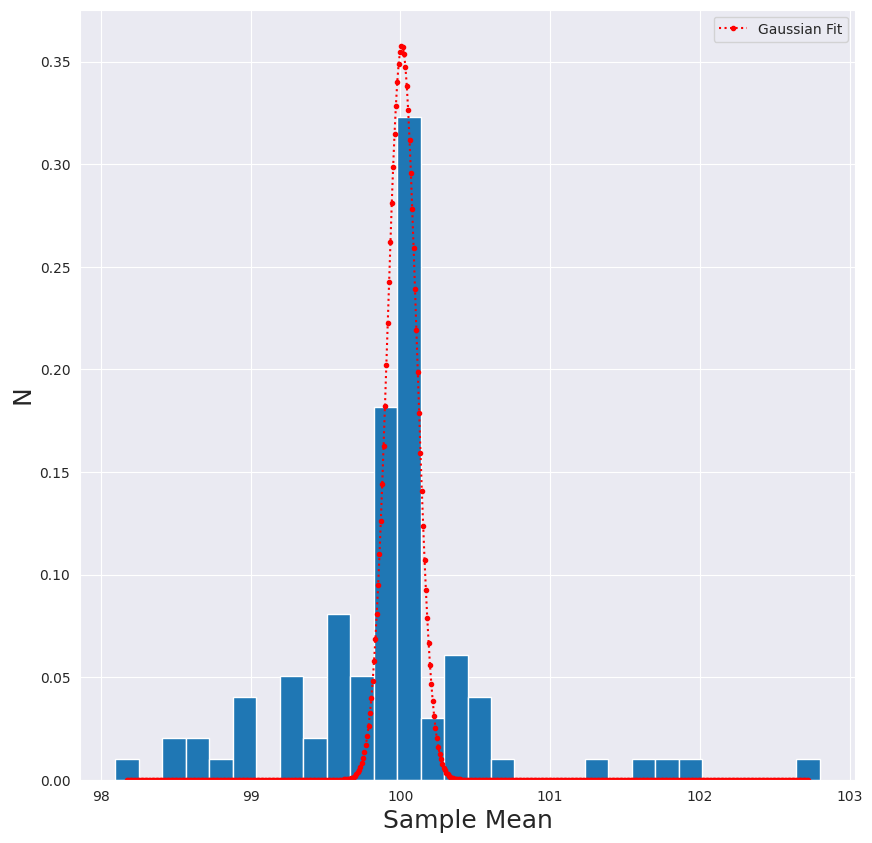

In [46]:
def gaussian(x, C, mu, sigma):
    return C * np.exp(-(x - mu)**2 / (2 * sigma**2))

heights, bin_edges, patch = pl.hist(all_means_binomial, bins=30)
heights = heights/sum(heights)

pl.close()

y_hist = heights
x_hist = (bin_edges[:-1] + bin_edges[1:]) / 2

mu = sum(x_hist * y_hist) / sum(y_hist)
sigma = sum(y_hist * (x_hist - mu)**2) / sum(y_hist)

popt, pcov = curve_fit(gaussian, x_hist, y_hist, p0=[max(y_hist), mu, sigma], maxfev=5000)

pl.figure(figsize=(10, 10))

x_hist_2 = np.linspace(np.min(x_hist), np.max(x_hist), 500)
pl.plot(x_hist_2, gaussian(x_hist_2, *popt),'r.:', label='Gaussian Fit')
pl.legend()

weights = np.ones_like(all_means_binomial) / len(all_means_binomial)
pl.hist(all_means_binomial, bins=30, weights=weights)
pl.xlabel('Sample Mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.show()

# Laplace Distribution

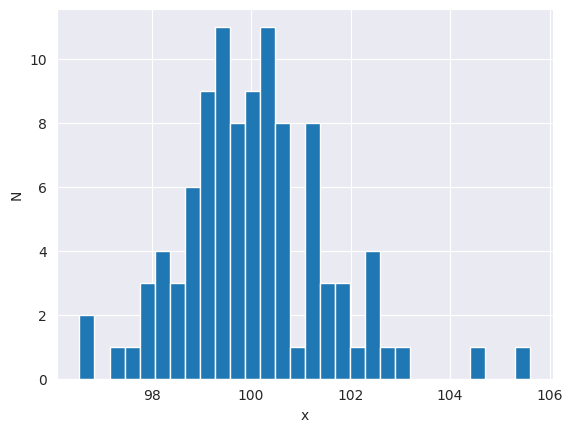

In [47]:
np.random.seed(1776)

mydists['laplace'] = {}
mydists['laplace'][100] = np.random.laplace(loc=my_mean, scale=1, size=100)

pl.hist(mydists['laplace'][100], bins = 30)
pl.ylabel('N')
pl.xlabel('x');

In [48]:
laplace_mean = mydists['laplace'][100].mean()
laplace_std = mydists['laplace'][100].std()

print(f'Laplace distribution mean = {laplace_mean:.2f}.', '\n', f'Laplace distribution standard deviation = {laplace_std:.2f}.')

Laplace distribution mean = 100.05. 
 Laplace distribution standard deviation = 1.49.


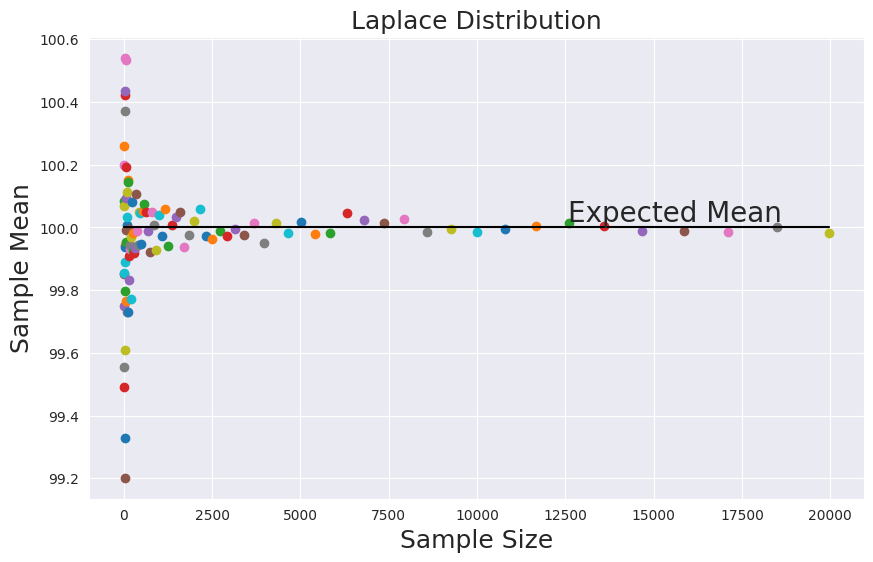

In [49]:
for n in my_size:
    mydists['laplace'][n] = np.random.laplace(loc=my_mean, scale=1, size=n)

mydists['laplace']['means'] = {}

axnormal_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in mydists['laplace']:
    if not type(nn) == str: # needed because one element is "mean"
        mydists['laplace']['means'][nn] = mydists['laplace'][nn].mean()
        #and plot it
        axnormal_mu_n.plot(nn, mydists['laplace']['means'][nn], 'o')
        axnormal_mu_n.set_xlabel('Sample Size', fontsize=18)
        axnormal_mu_n.set_ylabel('Sample Mean', fontsize=18)
axnormal_mu_n.set_title('Laplace Distribution', fontsize=18)
axnormal_mu_n.plot([min(my_size), max(my_size)], [my_mean, my_mean], 'k')
axnormal_mu_n.text(axnormal_mu_n.get_xlim()[1] * .6, 100, "Expected Mean",
                  va="bottom", fontsize=20);

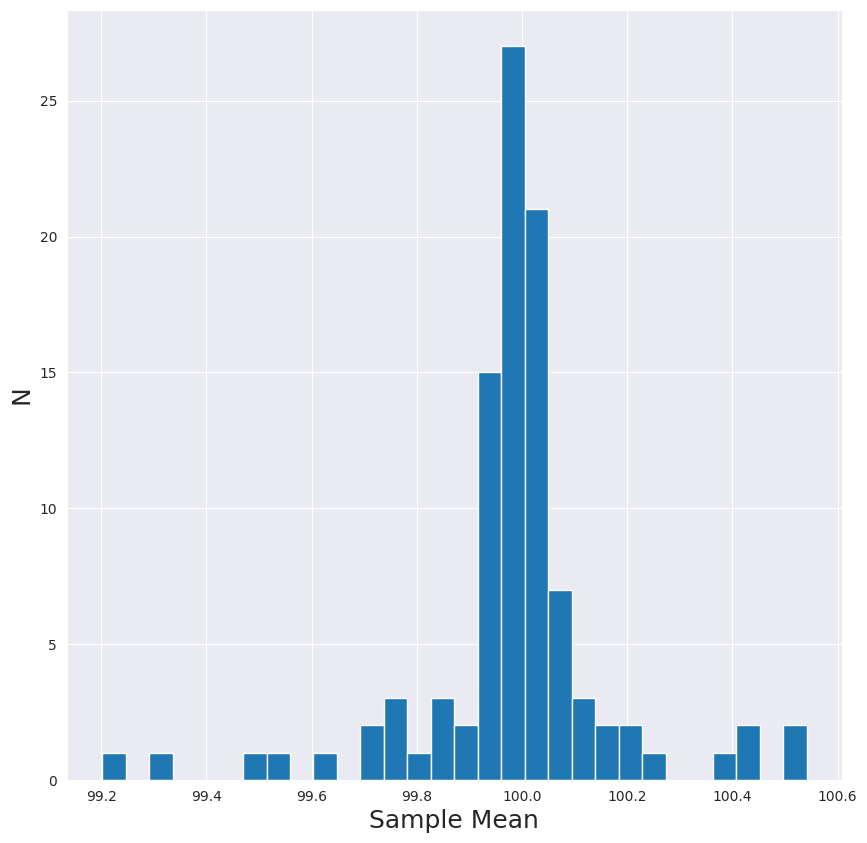

In [50]:
all_means_laplace = list(mydists['laplace']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(all_means_laplace, bins=30)
pl.xlabel('Sample Mean', fontsize = 18)
pl.ylabel('N', fontsize = 18);

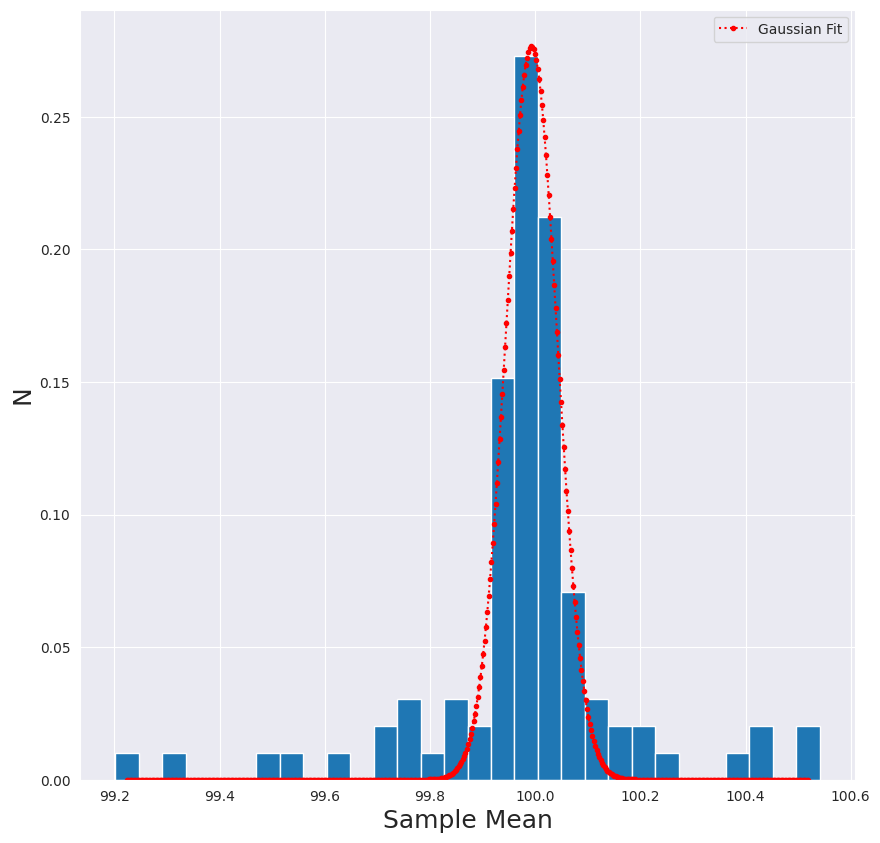

In [51]:
def gaussian(x, C, mu, sigma):
    return C * np.exp(-(x - mu)**2 / (2 * sigma**2))

heights, bin_edges, patch = pl.hist(all_means_laplace,bins=30)
heights = heights/sum(heights)

pl.close()

y_hist = heights
x_hist = (bin_edges[:-1] + bin_edges[1:]) / 2

mu = sum(x_hist * y_hist) / sum(y_hist)
sigma = sum(y_hist * (x_hist - mu)**2) / sum(y_hist)

popt, pcov = curve_fit(gaussian, x_hist, y_hist, p0=[max(y_hist), mu, sigma], maxfev=5000)

pl.figure(figsize=(10, 10))

x_hist_2 = np.linspace(np.min(x_hist), np.max(x_hist), 500)
pl.plot(x_hist_2, gaussian(x_hist_2, *popt),'r.:', label='Gaussian Fit')
pl.legend()

weights = np.ones_like(all_means_laplace) / len(all_means_laplace)
pl.hist(all_means_laplace, bins=30, weights=weights)
pl.xlabel('Sample Mean', fontsize = 18)
pl.ylabel('N', fontsize = 18);
pl.show()

# 661 students: fita  a Gaussian to the histogram of the means for each distribution

# Extra Credit for 461

to fit a curve to data you can, for example, use scipy.optimize.curve_fit(). Your y value should be the hight of each histogram bin, which you can extract by capturing the output of pl.hist() when you plot the histogram.
(be careful that the x axis and the y axis are not the same size when you extract them from the pl.hist function cause the x represents the **edges** while what you want is the **centers** of each bin

In [52]:
height, bins, patch  = pl.hist(allmeans,bins=30, density=True)
pl.xlabel("mean of the sample")
pl.ylabel("normalized frequency");

NameError: ignored

And you can create your own Gaussian function to pass to curve_fit as this for example:

In [ ]:
def gaussian(mu, sigma, x): # this is the gaussian you will fit

  g = (1 / sigma * np.sqrt(2 * np.pi)) * np.exp((x - mu)**2 / (-2 * sigma**2))

  return g
  '''
  REMEMBER TO WRITE A DOCSTRING THAT EXPLAINS WHAT A FUNCTION DOES EVERY TIME YOU WRITE A FUNCTION
  https://www.python.org/dev/peps/pep-0257/
  '''
def fun(args, x, hb): # this is the function you will minimize



  return ... # needs to return a single number representing the "distance" between the heigh of the histogram bins and the gaussian you create

Or you can use existing functions (scipy has one, but it would be instructive for you to write it yourself!)

**You can do it by eye** (partial credit 0.5/1).

It would be better to do it programmatically. To fit the data you can use `scipy.minimize` or `scipy.optimize`

In [ ]:
from scipy import optimize
optimize.minimize?
...

In [ ]:
sp.optimize.fmin?

In [ ]:
...